# Brendan - EDA playbook

In [1]:
import wave
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


import time
import pandas as pd
import wave
from tqdm import tqdm
import librosa
import librosa.display

In [2]:
print(np.__version__)

1.25.0


In [3]:
# Define the path to your CSV file and WAV file
csv_file_path = "snoring_labels/Label_040.csv"
wav_file_path = 'Video_00_040.wav'



# Step 1: Read the CSV file into a DataFrame
labeled_data = pd.read_csv(csv_file_path, delimiter=',', header=None, names=['start', 'end', 'label'])

#Obtain start sleep time
start_sleep_time= labeled_data["start"][0]

#removed start times
labeled_data=labeled_data.iloc[1:]

#reset index
labeled_data.reset_index(drop=True, inplace=True)

In [113]:
audio_data_mfcc, sample_rate_mfcc = librosa.load(wav_file_path)

hop_size_samples =40000
# Extract MFCCs
mfccs = librosa.feature.mfcc(y=audio_data_mfcc, sr=sample_rate_mfcc, hop_length=hop_size_samples ,n_mfcc=13)

# Calculate the timestamps for each frame
num_frames = mfccs.shape[1]
frame_hop_seconds = hop_size_samples / sample_rate_mfcc
timestamps_mfcc = np.arange(0, num_frames) * frame_hop_seconds


# Create a DataFrame with MFCCs and timestamps
temp_df = {'Timestamp': timestamps_mfcc}
for i in range(13):
    temp_df[f'MFCC_{i+1}'] = mfccs[i]

audio_mfccs = pd.DataFrame(temp_df)



In [114]:
audio_mfccs

,Timestamp,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,MFCC_11,MFCC_12,MFCC_13
0,0.000000,-713.283875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.814059,-513.843506,160.070572,-4.303763,-8.587132,26.898111,8.060608,1.087861,3.740776,-10.429405,-3.931969,6.347992,-10.645280,-10.755688
2,3.628118,-507.559204,164.678848,1.797745,6.720181,37.239513,8.371941,5.878177,11.075811,-12.571713,-9.185454,3.881531,-18.514832,-22.561478
3,5.442177,-423.878021,229.117096,-6.409144,-2.138588,44.531815,2.237760,-5.070574,15.454721,-1.368260,-4.895023,2.014547,-14.891168,-11.461468
4,7.256236,-535.350586,158.116791,23.996914,0.157422,14.219244,6.472923,7.144000,5.919758,-2.081122,2.264990,-3.326841,-15.530924,-2.171298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13627,24720.181406,-530.848328,157.415115,14.045679,-7.463132,14.186865,9.375787,9.743625,7.473002,-3.852460,-2.069723,-4.172759,-11.664152,-1.077698
13628,24721.995465,-532.697266,158.635849,18.850716,-5.137513,14.970737,11.057266,9.222932,3.109957,-6.762525,2.117476,1.735225,-14.539421,-8.446274
13629,24723.809524,-539.240295,145.478668,10.274982,0.636031,15.371614,-4.764143,-0.628963,7.497840,-6.308126,-3.845648,2.504337,-7.768212,-2.519926
13630,24725.623583,-519.136169,161.419205,8.071725,1.497275,30.327980,8.115197,-0.662882,3.755581,-9.560040,-10.110258,-2.253898,-9.064216,-8.360373


In [115]:
# Loop with a progress bar
audio_mfccs['label']=""
for i in tqdm(range(len(audio_mfccs)), desc="Processing"):
    timestamp = audio_mfccs.iloc[i, 0]
    
    if timestamp < min(merged_df['start']):
        audio_mfccs.iloc[i, 14] = "ND"
    elif timestamp > max(merged_df['end']):
        audio_mfccs.iloc[i, 14] = "ND"
    else:
        filtered_df = merged_df[(merged_df['start'] <= timestamp) & (merged_df['end'] >= timestamp)]
        third_column = filtered_df['label']
        audio_mfccs.iloc[i, 14] = third_column.values[0] if not filtered_df.empty else ''

Processing: 100%|██████████████████████████████████████████████████████████████████████| 13632/13632 [00:17<00:00, 784.63it/s]


In [116]:
#import sklearn
import sklearn
assert sklearn.__version__>="0.20"

In [117]:
filt_mfccs_1=audio_mfccs[audio_mfccs["label"] != "ND"]
filt_mfccs=filt_mfccs_1[["MFCC_1","MFCC_2","MFCC_3","MFCC_4","MFCC_5","MFCC_6","MFCC_7","MFCC_8","MFCC_9","MFCC_10","MFCC_11","MFCC_12","MFCC_13"]]

In [118]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#Scale the data
std_Scaler=StandardScaler().fit(filt_mfccs)
filt_mfccs = std_Scaler.transform(filt_mfccs)

#PCA transformation
pca = PCA(n_components=5)
train_X_PCA=pca.fit_transform(filt_mfccs)

#create dataframe for plotting
pc_scores=pd.DataFrame(train_X_PCA,columns=["PC1","PC2","PC3","PC4","PC5"])

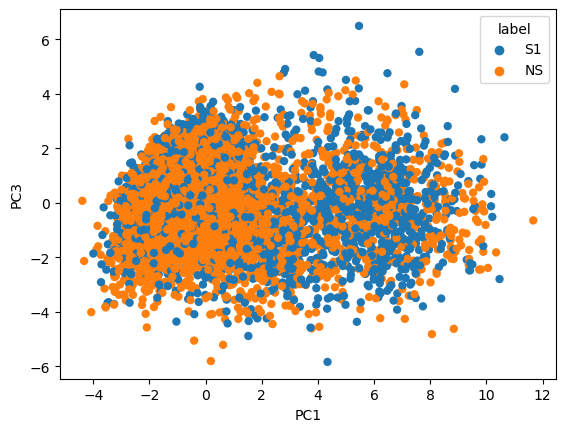

In [120]:
pc_scores["label"]=filt_mfccs_1["label"]
#scatterplot of PC1 vs PC2 coloured by diagnosis
sns.scatterplot(x='PC1', y='PC3', data=pc_scores,hue="label",edgecolor='none')
#extract the explained variance ratio
VR=pca.explained_variance_ratio_.round(decimals=2)
#add variance ratios to plot as text
#plt.text(-5, 6, 'Variance PC1 = {0}\nVariance PC2 = {1}\nTotal = {2}'.format(VR[0],VR[1],sum(VR)), fontsize=12, color='red')
plt.show()

IndexError: index 14 is out of bounds for axis 0 with size 14

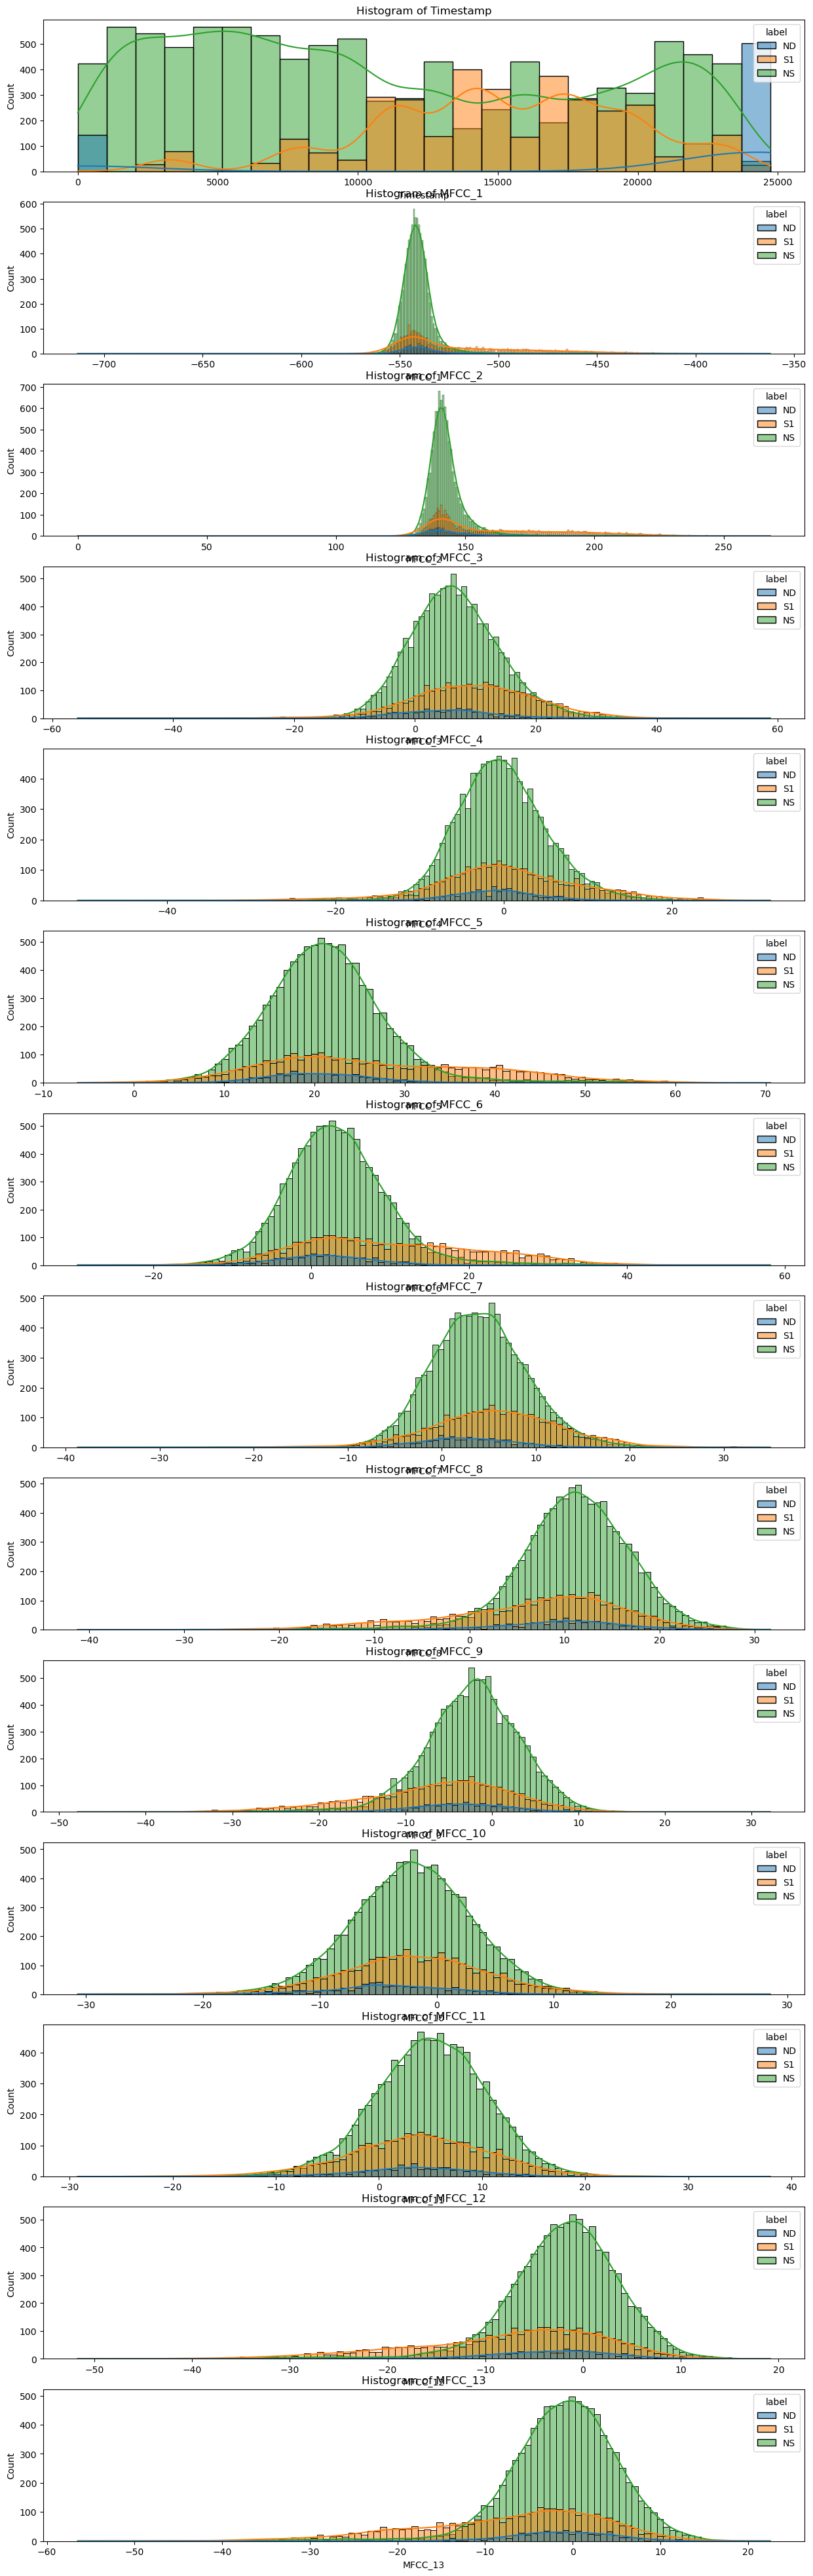

In [121]:
# Assuming you have a DataFrame called 'df'
# Create a figure with multiple subplots
fig, axes = plt.subplots(ncols=1, nrows=len(audio_mfccs.columns)-1, figsize=(15, 50))  # Adjust figsize as needed

# Loop through the columns and create histograms
for i, column in enumerate(audio_mfccs.columns):
    sns.histplot(data=audio_mfccs, x=column, ax=axes[i], kde=True,hue='label')  # You can customize kde and other plot settings
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()  

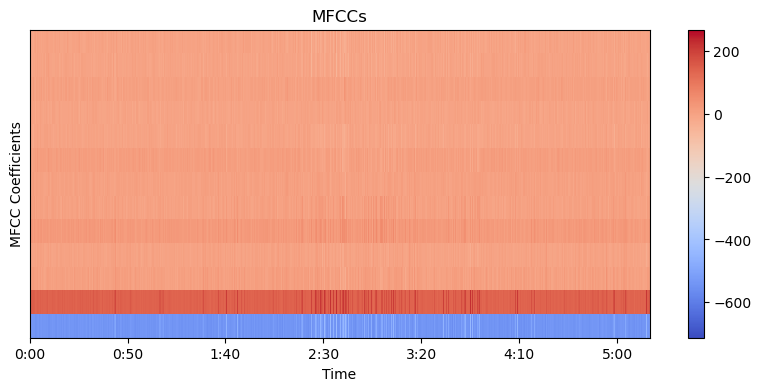

In [122]:
# Display MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.show()

### Insert No Snoring labels

In [45]:
# Initialize an empty list to store the new DataFrames
new_dfs = []

# Loop through the original DataFrame to calculate intervals
for i in range(len(labeled_data) - 1):
    start_interval = labeled_data.loc[i, 'end']
    end_interval = labeled_data.loc[i + 1, 'start']
    
    data_interval = {
        'start': [start_interval],
        'end': [end_interval],
        'label': ['NS']
    }
    
    
    new_df = pd.DataFrame(data_interval)
    new_dfs.append(new_df)

# Concatenate the new DataFrames into a single DataFrame
result_df = pd.concat(new_dfs, ignore_index=True)

merged_df = pd.concat([labeled_data, result_df], ignore_index=True)
merged_df=merged_df.sort_values(by=['start', 'end'])
merged_df.reset_index(drop=True, inplace=True)

In [145]:
# Read the WAV file
wav_file_path = 'Video_00_040.wav'
with wave.open(wav_file_path, 'rb') as wav_file:
    frames = wav_file.readframes(-1)
    audio_data = np.frombuffer(frames, dtype=np.int16)
    sample_rate = wav_file.getframerate()

# Create timestamps based on the sample rate
timestamps = np.arange(0, len(audio_data)) / sample_rate

# Create a DataFrame
audio_df = pd.DataFrame({'Timestamp': timestamps, 'Amplitude': audio_data})


In [146]:
# Set the desired interval duration (in seconds)
desired_interval_duration = 0.50  # You can change this to your desired interval

# Calculate the number of samples in each interval
samples_per_interval = int(sample_rate * desired_interval_duration)

# Create a DataFrame with larger timestamp intervals, including average and standard deviation
timestamps = np.arange(0, len(audio_data), samples_per_interval) / sample_rate

# Initialize lists to store interval averages and standard deviations
interval_averages = []
interval_std_devs = []

# Calculate average and standard deviation for each interval
for i in range(0, len(audio_data), samples_per_interval):
    interval = audio_data[i:i + samples_per_interval]
    interval_averages.append(interval.mean())
    interval_std_devs.append(interval.std())

audio_df = pd.DataFrame({'Timestamp': timestamps, 'Mean_Amplitude': interval_averages, 'Std_Deviation': interval_std_devs})


   Timestamp  Mean_Amplitude  Std_Deviation
0        0.0         0.79725      85.020863
1        0.5        -1.71525     106.606262
2        1.0        -1.12100     133.572047
3        1.5        -1.32800      94.036083
4        2.0        -1.15925     107.991654


In [147]:
# Loop with a progress bar
audio_df['label']=""
for i in tqdm(range(len(audio_df)), desc="Processing"):
    timestamp = audio_df.iloc[i, 0]
    
    if timestamp < min(merged_df['start']):
        audio_df.iloc[i, 3] = "ND"
    elif timestamp > max(merged_df['end']):
        audio_df.iloc[i, 3] = "ND"
    else:
        filtered_df = merged_df[(merged_df['start'] <= timestamp) & (merged_df['end'] >= timestamp)]
        third_column = filtered_df['label']
        audio_df.iloc[i, 3] = third_column.values[0] if not filtered_df.empty else ''


Processing: 100%|██████████████████████████████████████████████████████████████████████| 49458/49458 [01:01<00:00, 799.99it/s]


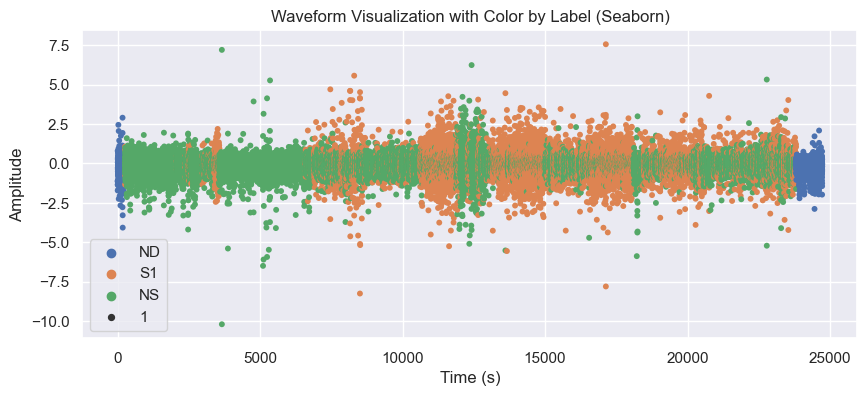

In [175]:
# Set the style for Seaborn (optional)
sns.set(style="darkgrid")

# Create a line plot with color based on 'label'
plt.figure(figsize=(10, 4))

sns.scatterplot(x='Timestamp',y='Mean_Amplitude',data=audio_df,hue='label',edgecolor='none',size=1)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform Visualization for{0}'.format(wav_file_path)

# Set the x-axis limits to display the range from 12000 to 14000

plt.legend()
plt.show()